In [7]:
import pandas as pd
df = pd.read_csv('Master_DB.csv')

In [8]:
print(df.columns)
print(df.head())

Index(['track_name', 'tag', 'artist_name', 'year_x', 'features', 'lyrics',
       'id', 'track_id', 'popularity', 'year_y', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'word_count', 'num_parts', 'unique_word_count',
       'has_chorus', 'has_intro', 'has_outro', 'has_bridge', 'cleaned_lyrics',
       'sentiment', 'negative_sentiment', 'neutral_sentiment',
       'positive_sentiment', 'average_word_length', 'stopword_count',
       'lyric_page_counter'],
      dtype='object')
          track_name  tag artist_name  year_x features  \
0  forgive me father  rap    fabolous    2003       {}   
1             fly in  rap   lil wayne    2005       {}   
2   money on my mind  rap   lil wayne    2005       {}   
3       december 4th  rap       jay-z    2003       {}   
4       98 freestyle  rap       big l    2000       {}   

                

In [9]:
unique_artists = df['artist_name'].nunique()
print("Number of unique artists:", unique_artists)

Number of unique artists: 17348


In [10]:
average_popularity = df['popularity'].mean()
print("Average popularity:", average_popularity)

Average popularity: 31.771653769193808


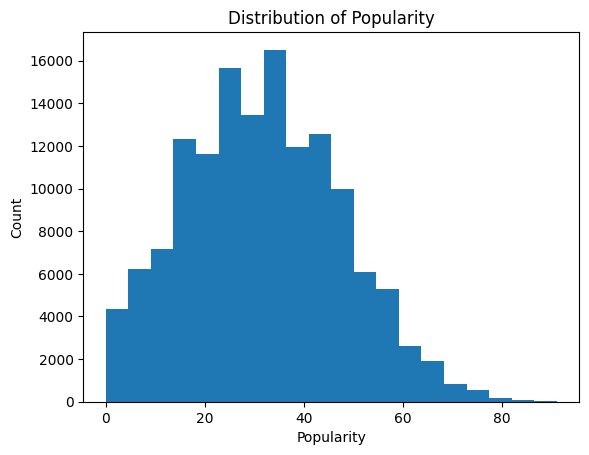

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['popularity'], bins=20)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popularity')
plt.show()

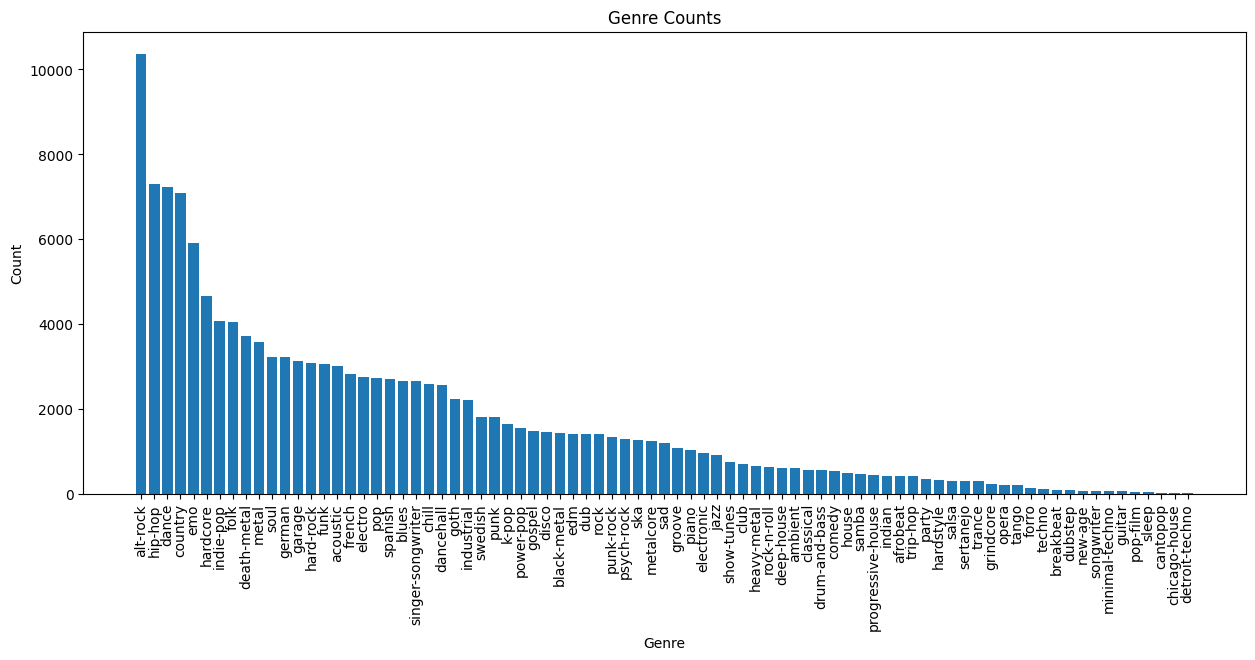

In [12]:
genre_counts = df['genre'].value_counts()
plt.figure(figsize=(15, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Counts')
plt.xticks(rotation=90)
plt.show()

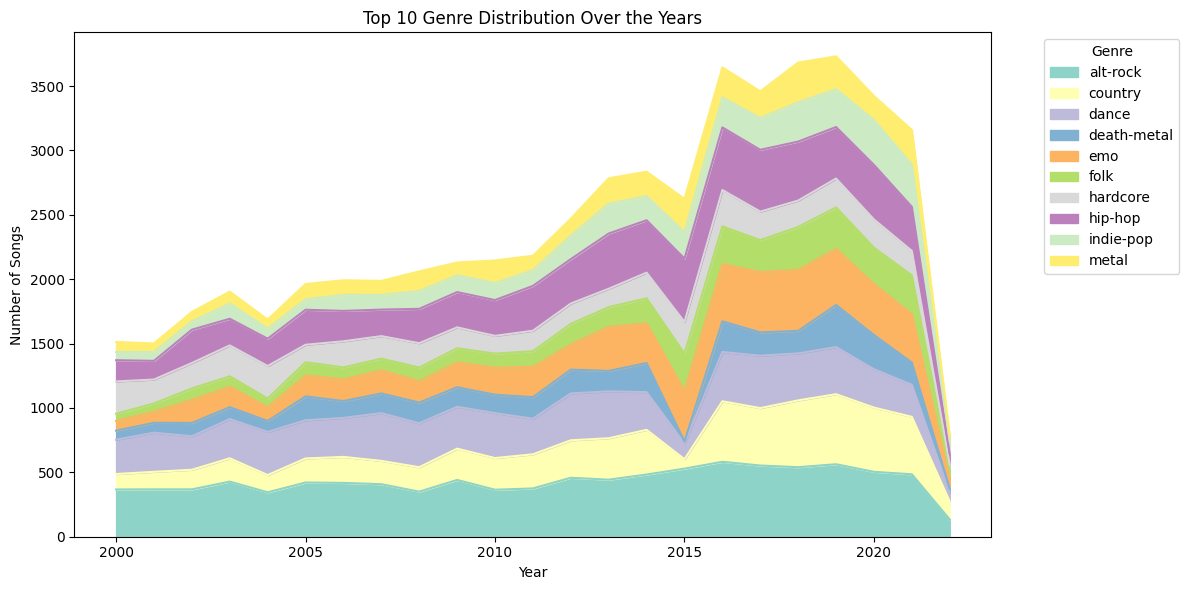

In [25]:
def top_genre_analysis_and_trends(lower_year=2000, upper_year=2023, top_n=10):
    # Group the data by 'genre' and count the number of songs across all years
    top_genres = df['genre'].value_counts().head(top_n).index

    # Filter the dataset to include only the top genres
    filtered_df = df[df['genre'].isin(top_genres)]

    # Group the data by 'year' and 'genre' and count the number of songs
    genre_counts = filtered_df.groupby(['year_x', 'genre']).size().unstack(fill_value=0)

    # Filter the years based on the provided range
    genre_counts = genre_counts[(genre_counts.index >= lower_year) & (genre_counts.index <= upper_year)]

    # Create a stacked area chart to visualize top genre distribution over the years
    genre_counts.plot(kind='area', stacked=True, figsize=(12, 6), colormap='Set3')

    plt.title(f'Top {top_n} Genre Distribution Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Songs')
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Example usage:
top_genre_analysis_and_trends(lower_year=2000, upper_year=2023, top_n=10)


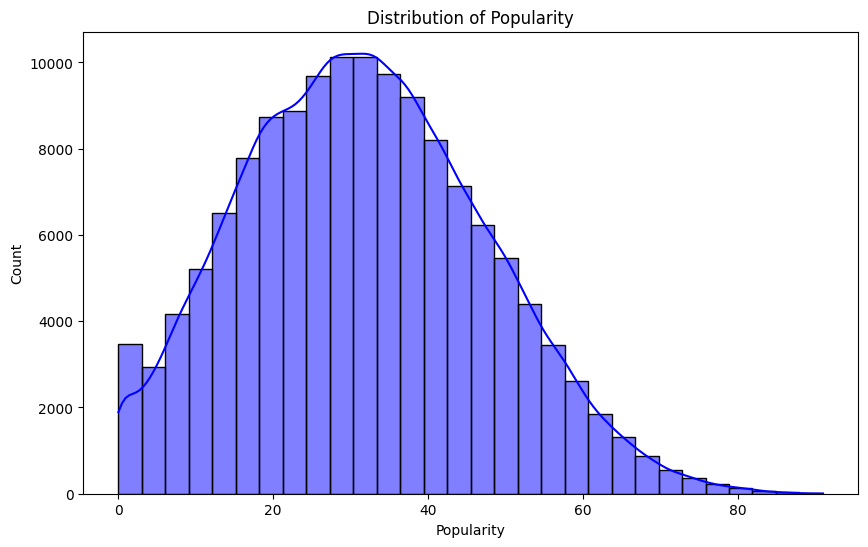

C:\Users\aldri\AppData\Local\Temp\ipykernel_25964\2297978792.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


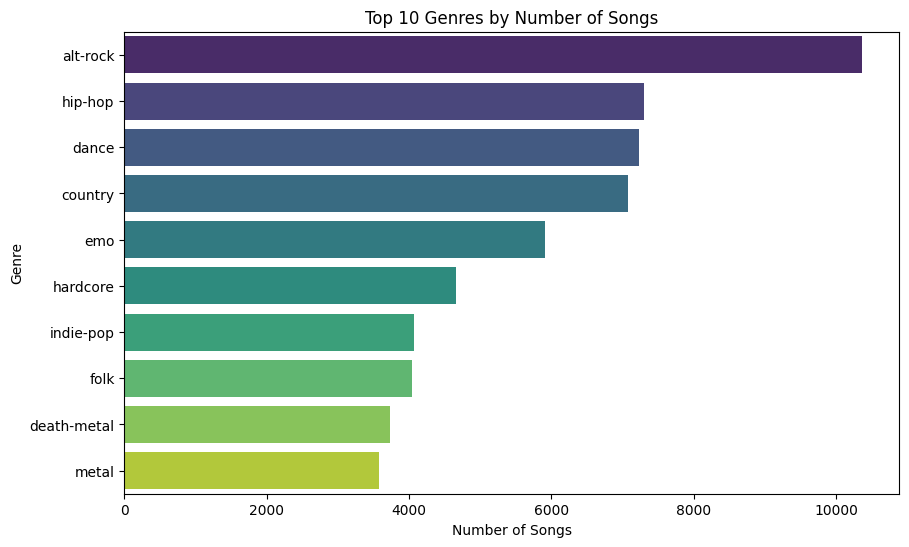

C:\Users\aldri\AppData\Local\Temp\ipykernel_25964\2297978792.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='coolwarm')


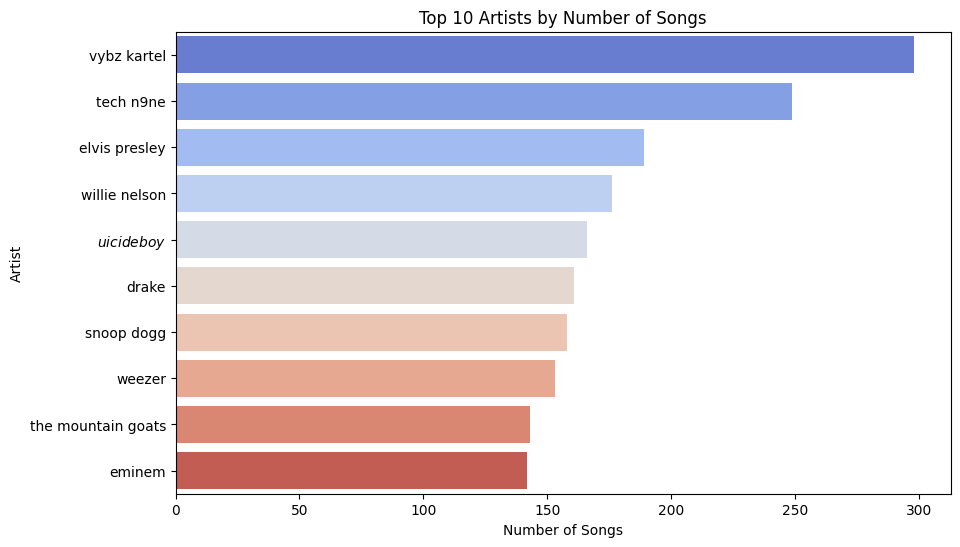

C:\Users\aldri\AppData\Local\Temp\ipykernel_25964\2297978792.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='year_x', palette='magma', order=sorted(filtered_df['year_x'].unique()))


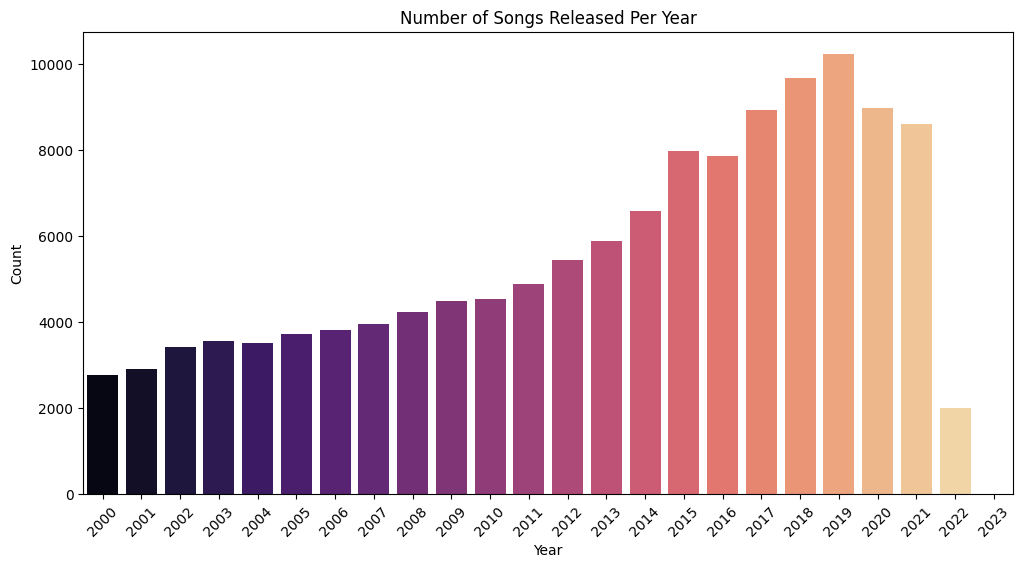

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

# Top 10 Genres
plt.figure(figsize=(10, 6))
top_genres = df['genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

# Top 10 Artists with Most Songs
plt.figure(figsize=(10, 6))
top_artists = df['artist_name'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='coolwarm')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()


# Song Release Trends Over Years with Year Cap
def song_release_trends(lower_year=2000, upper_year=2023):
    # Filter the dataframe based on the year range
    filtered_df = df[(df['year_x'] >= lower_year) & (df['year_x'] <= upper_year)]

    # Create the countplot
    plt.figure(figsize=(12, 6))
    sns.countplot(data=filtered_df, x='year_x', palette='magma', order=sorted(filtered_df['year_x'].unique()))
    plt.title('Number of Songs Released Per Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Example usage:
song_release_trends(lower_year=2000, upper_year=2023)





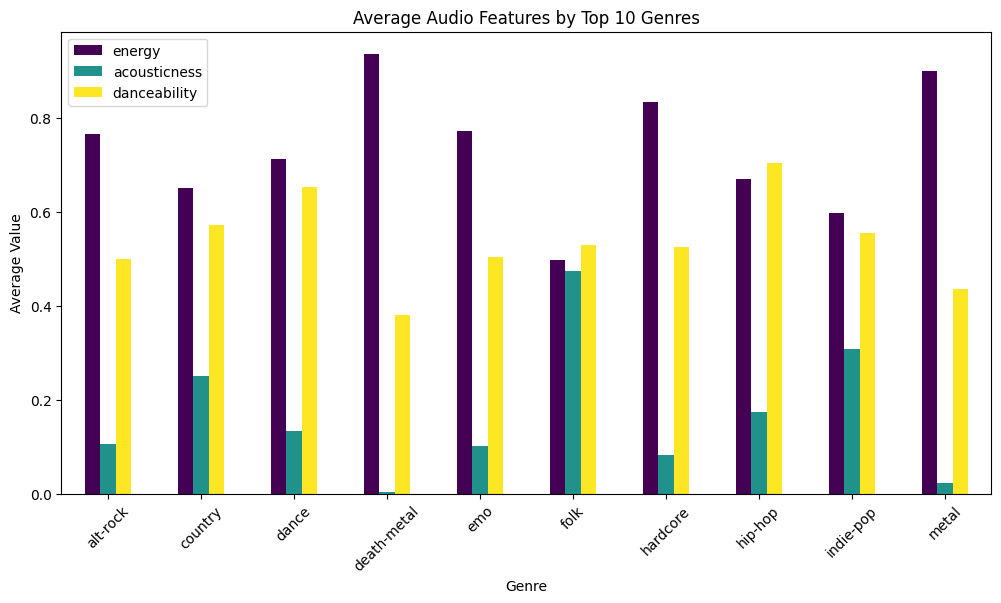

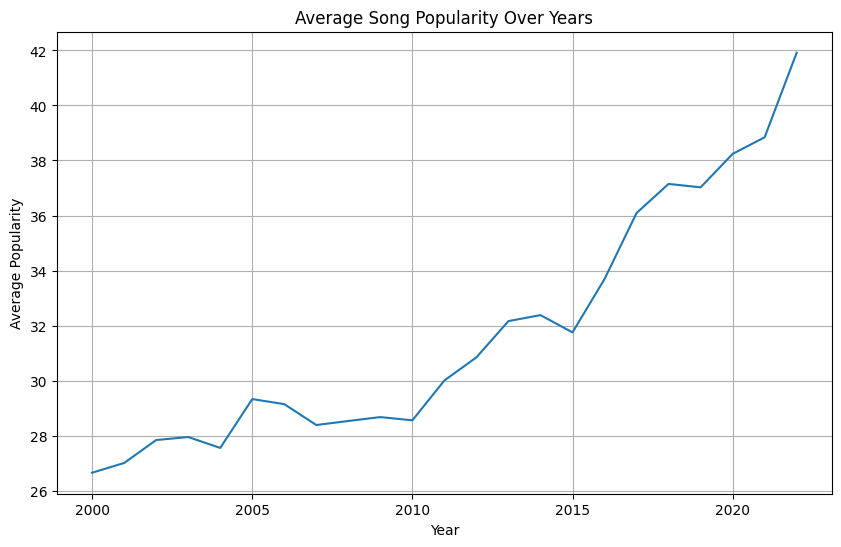

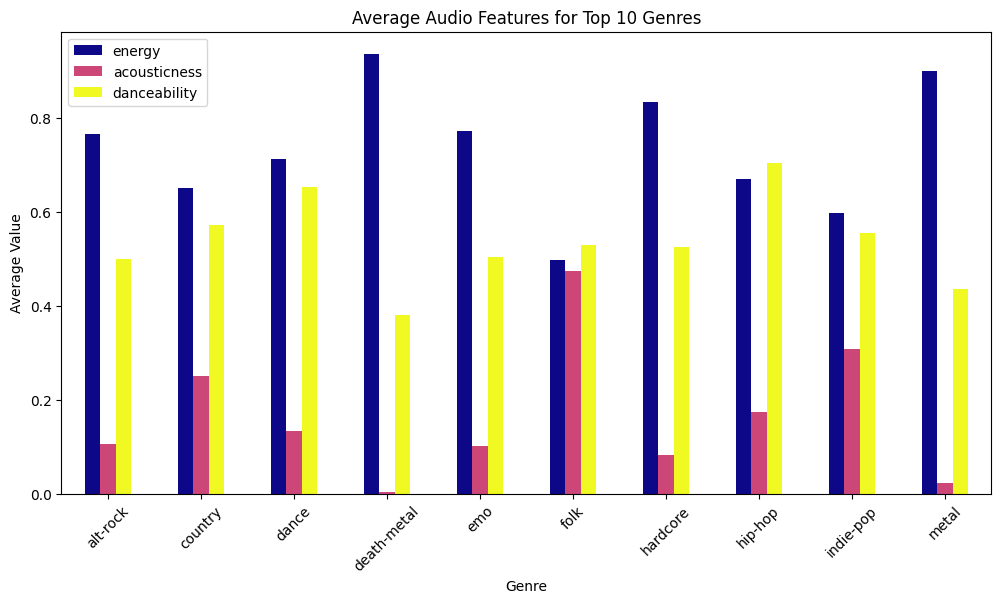

C:\Users\aldri\AppData\Local\Temp\ipykernel_25964\2444014815.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_genres, x='genre', y='unique_word_count', palette='pastel')


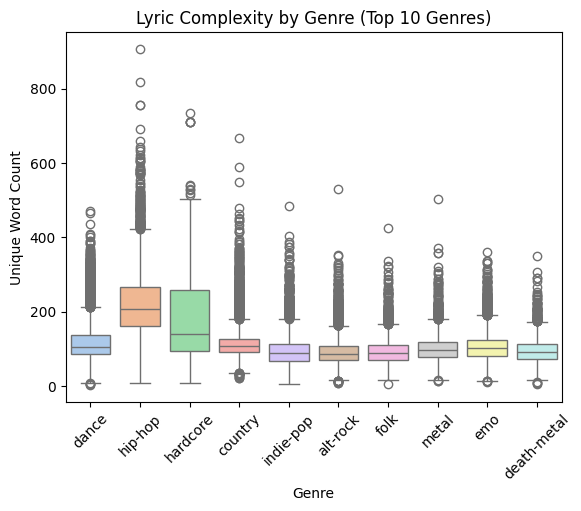

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Average Audio Features by Top 10 Genres
# This code calculates the mean of 'energy', 'acousticness', and 'danceability' for each genre.
# It then selects the top 10 genres based on the total number of songs and plots their average values.
top_10_genres = df['genre'].value_counts().head(10).index  # Get top 10 genres by song count
df_top_genres = df[df['genre'].isin(top_10_genres)]  # Filter the dataset for top 10 genres
df_top_genres.groupby('genre')[['energy', 'acousticness', 'danceability']].mean().plot(
    kind='bar', figsize=(12, 6), colormap='viridis'
)
plt.title('Average Audio Features by Top 10 Genres')
plt.ylabel('Average Value')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()

# 2. Average Song Popularity Over Years with Year Bounds
# This code calculates the average popularity of songs grouped by year and plots it.
# The year range is restricted using lower and upper bounds.
lower_year, upper_year = 2000, 2022  # Set year range
filtered_df = df[(df['year_x'] >= lower_year) & (df['year_x'] <= upper_year)]  # Filter data by year range
filtered_df.groupby('year_x')['popularity'].mean().plot(
    kind='line', figsize=(10, 6), title='Average Song Popularity Over Years'
)
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid()
plt.show()

# 3. Average Audio Features (Top 10 Genres)
# This is similar to the first plot but focuses purely on energy, acousticness, and danceability.
# The data is grouped for the top 10 genres and plotted as a bar graph.
df_top_genres.groupby('genre')[['energy', 'acousticness', 'danceability']].mean().plot(
    kind='bar', figsize=(12, 6), colormap='plasma'
)
plt.title('Average Audio Features for Top 10 Genres')
plt.ylabel('Average Value')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()

# 4. Lyric Complexity by Top 10 Genres
# This code creates a boxplot showing the distribution of 'unique_word_count' for the top 10 genres.
sns.boxplot(data=df_top_genres, x='genre', y='unique_word_count', palette='pastel')
plt.title('Lyric Complexity by Genre (Top 10 Genres)')
plt.xlabel('Genre')
plt.ylabel('Unique Word Count')
plt.xticks(rotation=45)
plt.show()
